# Notebook Overview

1. This notebook will be performing EDA on weather data with regards to dengue cases in Singapore. Weather factors have been shown to play a [key role in determining the spread of dengue.](https://www.news-medical.net/news/20220722/Weather-factors-play-a-key-role-in-determining-the-spread-of-dengue-and-other-viral-diseases.aspx#:~:text=Dengue%20fever%20generally%20occurs%20after,one%20to%20two%20months%20later.) I will perform EDA to explore what weather features are good predictors of dengue cases with the goal of using these features to improve model performance in predicting dengue cases.
1. Weather data was extracted from the [Meteorological Service Singapore](http://www.weather.gov.sg/climate-historical-daily/)(MSS). A separate dataset containing data on relative humidity in Singapore was extracted [data.gov.sg](https://data.gov.sg/dataset/relative-humidity-monthly-mean?view_id=5f35e486-f1b1-44a4-8bcd-3e09fe0f45fe&resource_id=4631174f-9858-463d-8a88-f3cb21588c67)
    1. Data extracted is from the past decade from 2012 - 2022.
    1. Data was extracted from the Changi weather station as it is the station that the [MSS uses for its historical records](https://biblioasia.nlb.gov.sg/vol-16/issue-2/jul-sep-2020/rain/)
1. Data for number of dengue cases was extracted from [data.gov.sg](https://data.gov.sg/dataset/weekly-infectious-disease-bulletin-cases)
    1. Data extracted is also from the past decade from 2012 - 2022.

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # for plotting
import matplotlib.pyplot as plt 
import os # for saving files
from matplotlib.patches import Rectangle # for drawing borders around heatmap
import statsmodels.api as sm # for statistical summaries
import plotly.express as px # for interactive plots

# Reading in Weather Data

In [2]:
weather =  pd.read_csv('../data/inputs/Weather_Information.csv')

In [3]:
weather

Station  Year  Month  Day  Daily Rainfall Total (mm)  \
0     Changi  2012      1    1                        0.6   
1     Changi  2012      1    2                        0.0   
2     Changi  2012      1    3                        0.0   
3     Changi  2012      1    4                        0.0   
4     Changi  2012      1    5                        0.0   
...      ...   ...    ...  ...                        ...   
4011  Changi  2022     12   27                        0.0   
4012  Changi  2022     12   28                        0.2   
4013  Changi  2022     12   29                       15.8   
4014  Changi  2022     12   30                        0.0   
4015  Changi  2022     12   31                        0.0   

      Mean Temperature (°C)  Maximum Temperature (°C)  \
0                      27.2                      31.4   
1                      27.7                      31.3   
2                      27.6                      30.9   
3                      27.4                      31.0   
4                      27.0                      30.7   
...                     ...                       ...   
4011                   27.4                      30.4   
4012                   26.8                      30.1   
4013                   26.3                      30.3   
4014                   27.2                      31.1   
4015                   27.4                      31.3   

      Minimum Temperature (°C) Mean Wind Speed (km/h) Max Wind Speed (km/h)  
0                         25.2                    8.4                  28.4  
1                         25.4                   13.6                  33.1  
2                         25.7                   15.4                  34.6  
3                         25.0                   13.3                  33.8  
4                         24.5                   12.2                  33.8  
...                        ...                    ...                   ...  
4011                      25.8                     14                    37  
4012                      25.3                   10.9                  33.3  
4013                      23.1                   10.4                  33.3  
4014                      25.0                   10.5                  33.3  
4015                      24.6                   11.3                  42.6  

[4016 rows x 10 columns]

## Checking for Missing Values, Outliers, Duplicated Values, etc.

In [4]:
weather['Max Wind Speed (km/h)'].unique()

array(['28.4', '33.1', '34.6', '33.8', '36', '37.1', '29.9', '22.3',
       '37.8', '31', '19.1', '64.8', '23', '27.4', '24.5', '29.2', '30.2',
       '34.2', '32.8', '25.6', '24.8', '40.3', '36.4', '31.7', '28.8',
       '36.7', '32.4', '30.6', '32', '38.9', '40.7', '42.1', '29.5',
       '31.3', '25.9', '28.1', '53.3', '41.4', '26.3', '22.7', '26.6',
       '27.7', '19.4', '18.7', '41', '25.2', '45.7', '56.9', '40', '34.9',
       '50', '39.2', '33.5', '27', '38.2', '44.3', '22', '52.9', '53.6',
       '42.5', '35.6', '46.4', '43.9', '21.6', '44.6', '35.3', '49.7',
       '43.2', '37.4', '45.4', '39.6', '43.6', '79.6', '18', '23.8',
       '41.8', '52.6', '49', '21.2', '20.2', '23.4', '38.5', '46.8',
       '19.8', '56.2', '20.5', '\x97', '17.3', '50.4', '20.9', '57.2',
       '75.2', '24.1', '47.2', '46.1', '51.1', '52.2', '18.4', '48.2',
       '42.8', '60.5', '59.8', '70.6', '61.9', '61.6', '15.8', '50.8',
       '-', '45', '51.5', '47.9', '59.4', '47.5', '55.1', '58.7', '16.9',
 

When I was acquiring the data, I noted that some values in the wind speed columns were dashes or left blank, 

As shown above, notice that there is a value listed as '-' and another value listed as '\x97' which are actually blanks and dashes.

I will impute these missing values using the previous observation as the previous observation would be only at most a few days before and the difference in windspeed would not vary greatly in a climate like Singapore, where the weather is generally [stable throughout the year.](https://www.introducingsingapore.com/weather#:~:text=The%20weather%20in%20Singapore%20is,%2C%20however%2C%20are%20two%20constants.)

In [5]:
weather[(weather['Max Wind Speed (km/h)'] == '-') | (weather['Max Wind Speed (km/h)'] == '\x97')]

Station  Year  Month  Day  Daily Rainfall Total (mm)  \
381   Changi  2013      1   16                        0.0   
382   Changi  2013      1   17                        0.0   
1136  Changi  2015      2   10                        0.0   
1137  Changi  2015      2   11                        0.0   
1138  Changi  2015      2   12                        0.0   
1139  Changi  2015      2   13                        0.0   
1725  Changi  2016      9   21                        2.5   
3011  Changi  2020      4    1                        0.0   
3023  Changi  2020      4   13                        0.0   
3131  Changi  2020      7   30                        0.6   
3161  Changi  2020      8   29                        6.6   
3256  Changi  2020     12    2                        4.6   
3259  Changi  2020     12    5                        0.0   
3262  Changi  2020     12    8                        0.0   
3297  Changi  2021      1   12                       13.0   

      Mean Temperature (°C)  Maximum Temperature (°C)  \
381                    27.4                      30.3   
382                    27.5                      30.7   
1136                   26.7                      30.4   
1137                   26.6                      31.1   
1138                   26.3                      30.8   
1139                   26.6                      30.8   
1725                   28.1                      33.6   
3011                   29.3                      32.7   
3023                   29.5                      33.7   
3131                   28.2                      31.6   
3161                   27.2                      30.8   
3256                   27.6                      31.6   
3259                   26.8                      31.2   
3262                   28.0                      32.6   
3297                   25.7                      28.9   

      Minimum Temperature (°C) Mean Wind Speed (km/h) Max Wind Speed (km/h)  
381                       26.1                                             
382                       25.2                                             
1136                      24.5                      -                     -  
1137                      23.6                      -                     -  
1138                      23.3                      -                     -  
1139                      24.0                   10.4                     -  
1725                      24.0                                             
3011                      26.4                    9.9                     -  
3023                      27.1                    8.4                     -  
3131                      25.3                    7.9                     -  
3161                      25.1                      8                     -  
3256                      24.3                    4.8                     -  
3259                      25.4                   18.8                     -  
3262                      25.6                   16.9                     -  
3297                      23.9                   14.1                     -

These are my rows with missing values.

## Imputing Missing Values

NOTE: I am imputing missing values now and not after the train test split as my test data will be data from the year 2022 onwards. All missing values were from before 2022, so imputing it now has no effect on my test data.

I am also not imputing missing values using any method which uses data from the test set such as mean, mode, or median imputation.

I will be imputing using forward fill, which means for a missing value, I will use the previous recorded value to impute it. For example, if the wind speed value for 2020-01-16 is missing, I will take the wind speed value for the previous day 2020-01-15 to impute the missing value.

There will be no data leakage involved in this process.

In [6]:
weather = weather.replace(['-', '\x97'], np.nan)# Replace '-' and '\x97' with numpy NaN values

In [7]:
# Forward fill missing values
weather = weather.fillna(method='ffill')

In [8]:
weather[(weather['Max Wind Speed (km/h)'] == '-') | (weather['Max Wind Speed (km/h)'] == '\x97')]

Empty DataFrame
Columns: [Station, Year, Month, Day, Daily Rainfall Total (mm), Mean Temperature (°C), Maximum Temperature (°C), Minimum Temperature (°C), Mean Wind Speed (km/h), Max Wind Speed (km/h)]
Index: []

In [9]:
weather[weather.duplicated()]# checking for duplicated rows

Empty DataFrame
Columns: [Station, Year, Month, Day, Daily Rainfall Total (mm), Mean Temperature (°C), Maximum Temperature (°C), Minimum Temperature (°C), Mean Wind Speed (km/h), Max Wind Speed (km/h)]
Index: []

In [10]:
len(weather.columns) == len(set(weather.columns)) # If it is true it means there are no columns with duplicated names, if it is False, there are columns with the same names

True

There are no duplicated rows and no duplicated columns.

In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Station                    4016 non-null   object 
 1   Year                       4016 non-null   int64  
 2   Month                      4016 non-null   int64  
 3   Day                        4016 non-null   int64  
 4   Daily Rainfall Total (mm)  4016 non-null   float64
 5   Mean Temperature (°C)      4016 non-null   float64
 6   Maximum Temperature (°C)   4016 non-null   float64
 7   Minimum Temperature (°C)   4016 non-null   float64
 8   Mean Wind Speed (km/h)     4016 non-null   object 
 9   Max Wind Speed (km/h)      4016 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 313.9+ KB


In [12]:
weather = weather.astype({'Mean Wind Speed (km/h)': 'float64','Max Wind Speed (km/h)':'float64'})

Notice my wind speed features are in the wrong data type. I have changed it to float datatype instead of object.

In [13]:
weather.describe()

Year        Month          Day  Daily Rainfall Total (mm)  \
count  4016.000000  4016.000000  4016.000000                4016.000000   
mean   2016.997759     6.524900    15.737550                   5.404457   
std       3.162946     3.448591     8.797987                  12.675569   
min    2012.000000     1.000000     1.000000                   0.000000   
25%    2014.000000     4.000000     8.000000                   0.000000   
50%    2017.000000     7.000000    16.000000                   0.000000   
75%    2020.000000    10.000000    23.000000                   4.200000   
max    2022.000000    12.000000    31.000000                 210.600000   

       Mean Temperature (°C)  Maximum Temperature (°C)  \
count            4016.000000               4016.000000   
mean               27.966932                 31.626967   
std                 1.106781                  1.490489   
min                23.000000                 23.700000   
25%                27.200000                 30.900000   
50%                28.000000                 31.900000   
75%                28.800000                 32.600000   
max                30.700000                 35.400000   

       Minimum Temperature (°C)  Mean Wind Speed (km/h)  Max Wind Speed (km/h)  
count               4016.000000             4016.000000            4016.000000  
mean                  25.382047                8.690264              32.566061  
std                    1.317006                2.968138               6.596067  
min                   20.900000                0.400000              14.800000  
25%                   24.500000                6.400000              28.100000  
50%                   25.400000                7.900000              31.700000  
75%                   26.300000               10.600000              36.000000  
max                   28.600000               21.400000              79.600000

Similar to the previous notebook, upon inspecting the max and mean values of each column, this time round there seems to be only one outlier which is the daily rainfall total column. All other columns dont seem to have outliers.



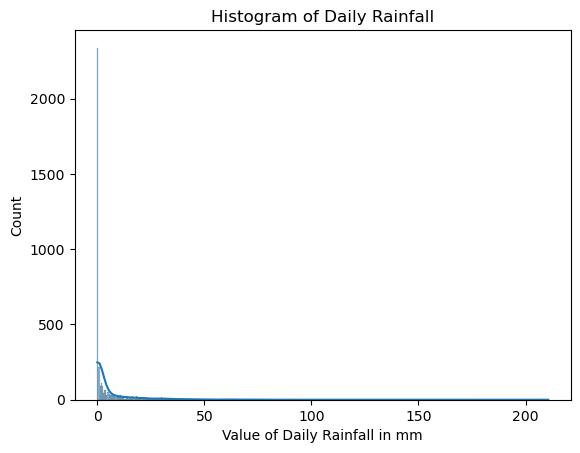

In [14]:
# plotting histogram of daily rainfall feature to show that it has outliers
plt.figure(dpi=100) 
sns.histplot(data = weather, x ='Daily Rainfall Total (mm)',kde=True)
plt.xlabel('Value of Daily Rainfall in mm')
plt.title('Histogram of Daily Rainfall');

Note the extremely skewed histogram, there are outliers in the daily rainfall feature.

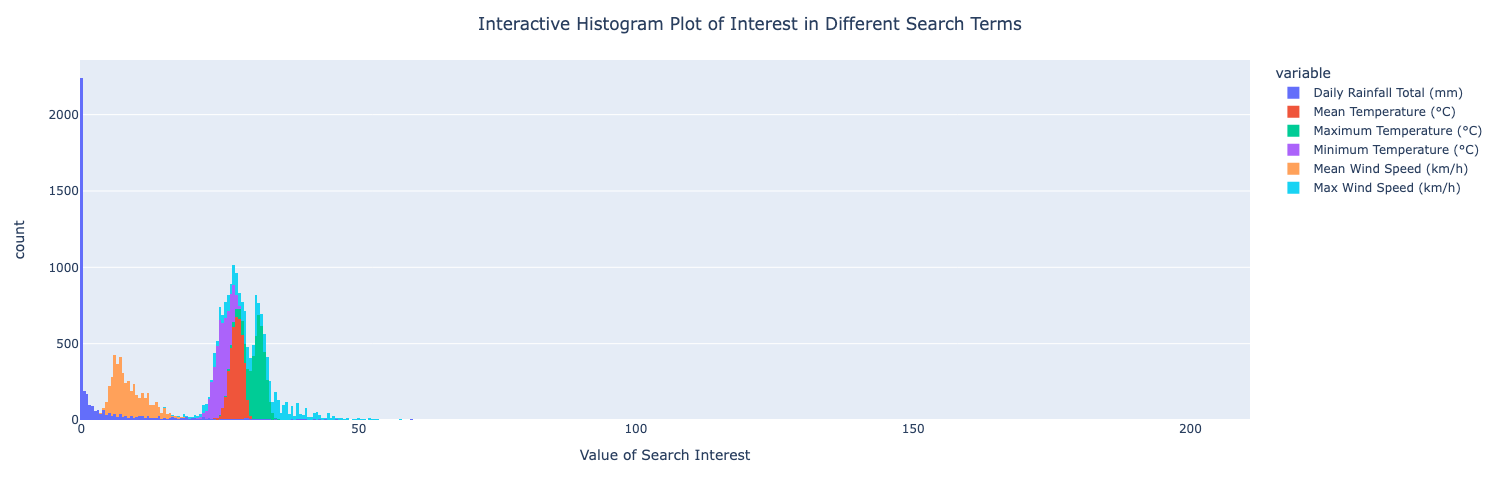

In [15]:
fig = px.histogram(weather.drop(['Station','Year','Month','Day'], axis=1)) #creating the plot without the month as it is not required in this histogram plot
fig.update_layout(title='Interactive Histogram Plot of Interest in Different Search Terms',
                  title_x = 0.5,
                  xaxis_title = 'Value of Search Interest',
                 width = 1500,
                 height = 500)
fig.show()

We can also inspect the distribution of the other features in the interactive plot below.

Notice that only Daily Rainfall Total has an extremely right skewed graph due to a few data points.

Max Wind Speed has a few outliers as well, but the other features' distributions are normal.

Regardless, I will also be keeping outliers in this dataset for the same reason as before.

## Removing Unnecessary Columns and Aggregating Data

In [16]:
weather

Station  Year  Month  Day  Daily Rainfall Total (mm)  \
0     Changi  2012      1    1                        0.6   
1     Changi  2012      1    2                        0.0   
2     Changi  2012      1    3                        0.0   
3     Changi  2012      1    4                        0.0   
4     Changi  2012      1    5                        0.0   
...      ...   ...    ...  ...                        ...   
4011  Changi  2022     12   27                        0.0   
4012  Changi  2022     12   28                        0.2   
4013  Changi  2022     12   29                       15.8   
4014  Changi  2022     12   30                        0.0   
4015  Changi  2022     12   31                        0.0   

      Mean Temperature (°C)  Maximum Temperature (°C)  \
0                      27.2                      31.4   
1                      27.7                      31.3   
2                      27.6                      30.9   
3                      27.4                      31.0   
4                      27.0                      30.7   
...                     ...                       ...   
4011                   27.4                      30.4   
4012                   26.8                      30.1   
4013                   26.3                      30.3   
4014                   27.2                      31.1   
4015                   27.4                      31.3   

      Minimum Temperature (°C)  Mean Wind Speed (km/h)  Max Wind Speed (km/h)  
0                         25.2                     8.4                   28.4  
1                         25.4                    13.6                   33.1  
2                         25.7                    15.4                   34.6  
3                         25.0                    13.3                   33.8  
4                         24.5                    12.2                   33.8  
...                        ...                     ...                    ...  
4011                      25.8                    14.0                   37.0  
4012                      25.3                    10.9                   33.3  
4013                      23.1                    10.4                   33.3  
4014                      25.0                    10.5                   33.3  
4015                      24.6                    11.3                   42.6  

[4016 rows x 10 columns]

In [17]:
weather = weather.drop('Station',axis=1)# dropping station feature, as all rows come from the same Changi Station. No reason to keep the feature.

In [18]:
weather

Year  Month  Day  Daily Rainfall Total (mm)  Mean Temperature (°C)  \
0     2012      1    1                        0.6                   27.2   
1     2012      1    2                        0.0                   27.7   
2     2012      1    3                        0.0                   27.6   
3     2012      1    4                        0.0                   27.4   
4     2012      1    5                        0.0                   27.0   
...    ...    ...  ...                        ...                    ...   
4011  2022     12   27                        0.0                   27.4   
4012  2022     12   28                        0.2                   26.8   
4013  2022     12   29                       15.8                   26.3   
4014  2022     12   30                        0.0                   27.2   
4015  2022     12   31                        0.0                   27.4   

      Maximum Temperature (°C)  Minimum Temperature (°C)  \
0                         31.4                      25.2   
1                         31.3                      25.4   
2                         30.9                      25.7   
3                         31.0                      25.0   
4                         30.7                      24.5   
...                        ...                       ...   
4011                      30.4                      25.8   
4012                      30.1                      25.3   
4013                      30.3                      23.1   
4014                      31.1                      25.0   
4015                      31.3                      24.6   

      Mean Wind Speed (km/h)  Max Wind Speed (km/h)  
0                        8.4                   28.4  
1                       13.6                   33.1  
2                       15.4                   34.6  
3                       13.3                   33.8  
4                       12.2                   33.8  
...                      ...                    ...  
4011                    14.0                   37.0  
4012                    10.9                   33.3  
4013                    10.4                   33.3  
4014                    10.5                   33.3  
4015                    11.3                   42.6  

[4016 rows x 9 columns]

**Next I will aggregate the values as recall my google search trend dataset is by months, compared to this dataset which is in days. I will combine the days into months so that I am able to merge it together with the google trends dataset later on.**

I will be aggregating each feature based on what their values are supposed to be. 

For example, the aggregation function for mean temperature will be mean and the aggregation function for maximum temperature will be max.

In [19]:
# Define the aggregation functions for each column
aggregations = {
    'Daily Rainfall Total (mm)': 'sum',
    'Mean Temperature (°C)': 'mean',
    'Maximum Temperature (°C)': 'max',
    'Minimum Temperature (°C)': 'min',
    'Mean Wind Speed (km/h)': 'mean',
    'Max Wind Speed (km/h)': 'max'
}

# Group the DataFrame by Year and Month and apply the aggregation functions
monthly_weather = weather.groupby(['Year', 'Month']).agg(aggregations)

# Resetting the index
monthly_weather = monthly_weather.reset_index()

# Combine 'Year' and 'Month' columns into 'Date' column and change it to datetime object
monthly_weather['Date'] = pd.to_datetime(monthly_weather[['Year', 'Month']].assign(day=1))

# Drop the 'Year' and 'Month' columns
monthly_weather = monthly_weather.drop(['Year', 'Month'], axis=1)

monthly_weather = monthly_weather.set_index('Date')

monthly_weather = monthly_weather.rename(columns={'Daily Rainfall Total (mm)':' Rainfall Total (mm)'})

monthly_weather

Rainfall Total (mm)  Mean Temperature (°C)  \
Date                                                      
2012-01-01                 106.1              26.703226   
2012-02-01                  83.6              27.137931   
2012-03-01                 313.4              27.016129   
2012-04-01                 260.6              27.613333   
2012-05-01                 292.0              28.174194   
...                          ...                    ...   
2022-08-01                 141.4              28.135484   
2022-09-01                 121.0              27.930000   
2022-10-01                 279.6              27.545161   
2022-11-01                 313.8              27.366667   
2022-12-01                 215.4              26.748387   

            Maximum Temperature (°C)  Minimum Temperature (°C)  \
Date                                                             
2012-01-01                      32.5                      21.5   
2012-02-01                      32.9                      22.7   
2012-03-01                      33.2                      21.1   
2012-04-01                      32.9                      21.9   
2012-05-01                      33.7                      22.0   
...                              ...                       ...   
2022-08-01                      33.2                      23.7   
2022-09-01                      32.6                      22.4   
2022-10-01                      34.6                      23.1   
2022-11-01                      33.9                      22.4   
2022-12-01                      32.7                      23.1   

            Mean Wind Speed (km/h)  Max Wind Speed (km/h)  
Date                                                       
2012-01-01                9.083871                   64.8  
2012-02-01                9.889655                   42.1  
2012-03-01                6.864516                   56.9  
2012-04-01                6.380000                   50.0  
2012-05-01                6.996774                   53.6  
...                            ...                    ...  
2022-08-01                8.616129                   53.7  
2022-09-01                7.360000                   51.9  
2022-10-01                6.251613                   40.4  
2022-11-01                6.950000                   51.9  
2022-12-01                8.758065                   42.6  

[132 rows x 6 columns]

I can now merge my weather information dataset with the relative humidity dataset which was acquired separately.

## Reading in Humidity Dataset

In [20]:
humidity = pd.read_csv('../data/inputs/Relative_Humidity.csv')

In [21]:
humidity.head()

Unnamed: 0    month  mean_rh
0         360  2012-01     87.3
1         361  2012-02     85.6
2         362  2012-03     87.3
3         363  2012-04     85.1
4         364  2012-05     83.1

In [22]:
humidity = humidity.drop('Unnamed: 0',axis=1) # dropping unnecessary columns. 

In [23]:
humidity.info() # checking for null values, there is no null values in the single feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    132 non-null    object 
 1   mean_rh  132 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [24]:
humidity.describe() # There is no outliers as the quartiles' values are all quite close together.

mean_rh
count  132.000000
mean    79.142424
std      3.468179
min     72.000000
25%     76.875000
50%     79.000000
75%     81.125000
max     87.300000

In [25]:
# Convert 'month' column to datetime object
humidity['month'] = pd.to_datetime(humidity['month'], format='%Y-%m')

# Set 'month' column as the index to merge with weather dataset
humidity.set_index('month', inplace=True)

humidity

mean_rh
month              
2012-01-01     87.3
2012-02-01     85.6
2012-03-01     87.3
2012-04-01     85.1
2012-05-01     83.1
...             ...
2022-08-01     77.4
2022-09-01     76.9
2022-10-01     78.7
2022-11-01     79.9
2022-12-01     81.2

[132 rows x 1 columns]

I can now merge the weather and humidity dataframes together.

In [26]:
monthly_weather = pd.merge(monthly_weather,humidity,left_index=True,right_index=True)
monthly_weather

Rainfall Total (mm)  Mean Temperature (°C)  \
Date                                                      
2012-01-01                 106.1              26.703226   
2012-02-01                  83.6              27.137931   
2012-03-01                 313.4              27.016129   
2012-04-01                 260.6              27.613333   
2012-05-01                 292.0              28.174194   
...                          ...                    ...   
2022-08-01                 141.4              28.135484   
2022-09-01                 121.0              27.930000   
2022-10-01                 279.6              27.545161   
2022-11-01                 313.8              27.366667   
2022-12-01                 215.4              26.748387   

            Maximum Temperature (°C)  Minimum Temperature (°C)  \
Date                                                             
2012-01-01                      32.5                      21.5   
2012-02-01                      32.9                      22.7   
2012-03-01                      33.2                      21.1   
2012-04-01                      32.9                      21.9   
2012-05-01                      33.7                      22.0   
...                              ...                       ...   
2022-08-01                      33.2                      23.7   
2022-09-01                      32.6                      22.4   
2022-10-01                      34.6                      23.1   
2022-11-01                      33.9                      22.4   
2022-12-01                      32.7                      23.1   

            Mean Wind Speed (km/h)  Max Wind Speed (km/h)  mean_rh  
Date                                                                
2012-01-01                9.083871                   64.8     87.3  
2012-02-01                9.889655                   42.1     85.6  
2012-03-01                6.864516                   56.9     87.3  
2012-04-01                6.380000                   50.0     85.1  
2012-05-01                6.996774                   53.6     83.1  
...                            ...                    ...      ...  
2022-08-01                8.616129                   53.7     77.4  
2022-09-01                7.360000                   51.9     76.9  
2022-10-01                6.251613                   40.4     78.7  
2022-11-01                6.950000                   51.9     79.9  
2022-12-01                8.758065                   42.6     81.2  

[132 rows x 7 columns]

In [27]:
monthly_weather.to_csv('../data/outputs/weather.csv') # saving csv file

I can now merge it together with dengue cases dataset.

## Reading in Dengue Cases Dataset

In [28]:
dengue_cases = pd.read_csv('../data/outputs/monthly_dengue_cases.csv')

In [29]:
dengue_cases

date  number_of_dengue_cases
0    2012-01-01                     332
1    2012-02-01                     257
2    2012-03-01                     229
3    2012-04-01                     360
4    2012-05-01                     337
..          ...                     ...
127  2022-08-01                    3690
128  2022-09-01                    2011
129  2022-10-01                    1776
130  2022-11-01                    1113
131  2022-12-01                    1170

[132 rows x 2 columns]

This dataset was already checked in the previous notebook for the usual outliers, missing values, etc. so I will move straight to merging the dataframes.

In [30]:
dengue_cases['date'] = pd.to_datetime(dengue_cases['date'])
dengue_cases = dengue_cases.set_index('date')
monthly_weather = pd.merge(monthly_weather,dengue_cases,left_index=True,right_index=True)
monthly_weather

Rainfall Total (mm)  Mean Temperature (°C)  \
Date                                                      
2012-01-01                 106.1              26.703226   
2012-02-01                  83.6              27.137931   
2012-03-01                 313.4              27.016129   
2012-04-01                 260.6              27.613333   
2012-05-01                 292.0              28.174194   
...                          ...                    ...   
2022-08-01                 141.4              28.135484   
2022-09-01                 121.0              27.930000   
2022-10-01                 279.6              27.545161   
2022-11-01                 313.8              27.366667   
2022-12-01                 215.4              26.748387   

            Maximum Temperature (°C)  Minimum Temperature (°C)  \
Date                                                             
2012-01-01                      32.5                      21.5   
2012-02-01                      32.9                      22.7   
2012-03-01                      33.2                      21.1   
2012-04-01                      32.9                      21.9   
2012-05-01                      33.7                      22.0   
...                              ...                       ...   
2022-08-01                      33.2                      23.7   
2022-09-01                      32.6                      22.4   
2022-10-01                      34.6                      23.1   
2022-11-01                      33.9                      22.4   
2022-12-01                      32.7                      23.1   

            Mean Wind Speed (km/h)  Max Wind Speed (km/h)  mean_rh  \
Date                                                                 
2012-01-01                9.083871                   64.8     87.3   
2012-02-01                9.889655                   42.1     85.6   
2012-03-01                6.864516                   56.9     87.3   
2012-04-01                6.380000                   50.0     85.1   
2012-05-01                6.996774                   53.6     83.1   
...                            ...                    ...      ...   
2022-08-01                8.616129                   53.7     77.4   
2022-09-01                7.360000                   51.9     76.9   
2022-10-01                6.251613                   40.4     78.7   
2022-11-01                6.950000                   51.9     79.9   
2022-12-01                8.758065                   42.6     81.2   

            number_of_dengue_cases  
Date                                
2012-01-01                     332  
2012-02-01                     257  
2012-03-01                     229  
2012-04-01                     360  
2012-05-01                     337  
...                            ...  
2022-08-01                    3690  
2022-09-01                    2011  
2022-10-01                    1776  
2022-11-01                    1113  
2022-12-01                    1170  

[132 rows x 8 columns]

The merged weather dataset with number of dengue cases as shown above. I will perform EDA on this dataset now.

# EDA

Let's first make a heatmap to check the correlations of our weather features against the number of dengue cases.

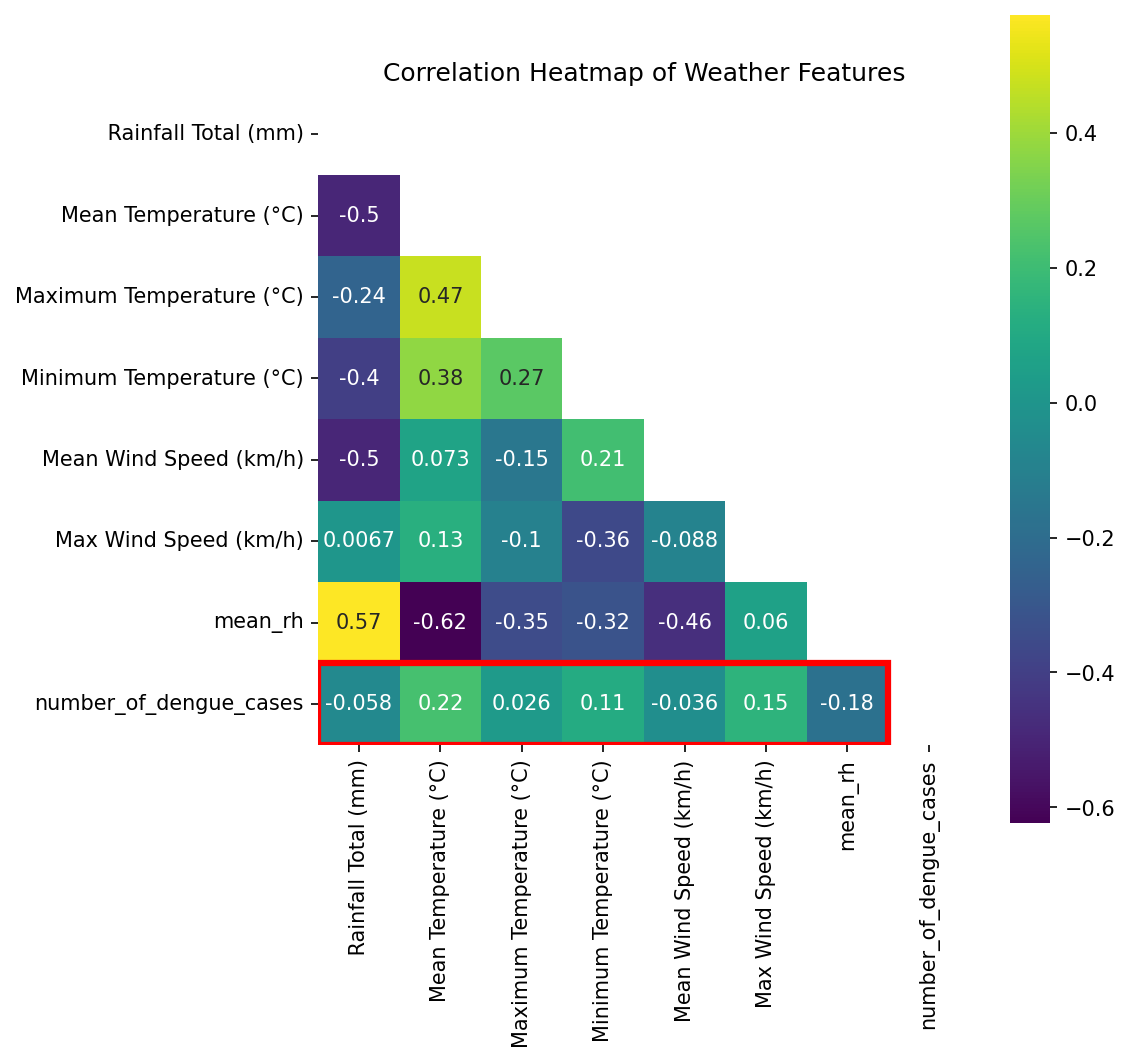

In [31]:
plt.figure(figsize=(7,7),dpi = 150)
corr = monthly_weather.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask = mask, annot = True, cmap='viridis', square=True)
plt.title('Correlation Heatmap of Weather Features')
ax.add_patch(Rectangle((0,7), 7, 1, fill=False, edgecolor='red', lw=3));


In [32]:
monthly_weather.corr().iloc[:7,7:8]# filtering out the correlation values that we are interested in for clarity.

number_of_dengue_cases
 Rainfall Total (mm)                   -0.057515
Mean Temperature (°C)                   0.222314
Maximum Temperature (°C)                0.026349
Minimum Temperature (°C)                0.109560
Mean Wind Speed (km/h)                 -0.035917
Max Wind Speed (km/h)                   0.150231
mean_rh                                -0.176137

Unfortunately the correlation between our weather features and the target variable is really bad with the highest correlation being only 0.22. One reason for this would be that the weather features may indeed be predictive of dengue cases, but with a time lag instead of comparing it during the same time period.

For example, certain weather conditions may promote the growth of aedes mosuqitos, and since the mosquitoes take [around a week to hatch and grow](https://www.cdc.gov/dengue/resources/factsheets/mosquitolifecyclefinal.pdf), it would not be right to compare the data during the same time period. I will lag the weather features instead and see if this improves the correlation between my weather features and number of dengue cases.

**Deciding on how much Lag** 

With regards to how much lag should be placed on the features, I will try 1 month, 2 month, 3 months,  and 4 months based on past research which showed that these periods were beneficial in predicting dengue cases.

1. [Dengue incidence found to increase linearly with elevated temperatures and rainfall at a time lag of between 5 - 16 weeks](https://pubmed.ncbi.nlm.nih.gov/20052380/)

I will now lag the data accordingly.

In [33]:
def shift_data(number_of_months):
    name = monthly_weather.copy() #making a new dataframe with the respective lagged periods
    name[f'dengue_cases_month_{number_of_months}'] = name['number_of_dengue_cases'].shift(number_of_months)# creating the new column with the lagged value 
    return name.dropna().corr().iloc[:7,-1:]# returning the correlation values that we are interest in.

Defining a function which takes in the number of months to lag the dengue cases, for example -1 means to shift the dengue cases backwards in time by 1 month, before returning the new correlation values against this lagged dengue cases.

Further clarity provided below.


In [34]:
monthly_weather.head()

Rainfall Total (mm)  Mean Temperature (°C)  \
Date                                                      
2012-01-01                 106.1              26.703226   
2012-02-01                  83.6              27.137931   
2012-03-01                 313.4              27.016129   
2012-04-01                 260.6              27.613333   
2012-05-01                 292.0              28.174194   

            Maximum Temperature (°C)  Minimum Temperature (°C)  \
Date                                                             
2012-01-01                      32.5                      21.5   
2012-02-01                      32.9                      22.7   
2012-03-01                      33.2                      21.1   
2012-04-01                      32.9                      21.9   
2012-05-01                      33.7                      22.0   

            Mean Wind Speed (km/h)  Max Wind Speed (km/h)  mean_rh  \
Date                                                                 
2012-01-01                9.083871                   64.8     87.3   
2012-02-01                9.889655                   42.1     85.6   
2012-03-01                6.864516                   56.9     87.3   
2012-04-01                6.380000                   50.0     85.1   
2012-05-01                6.996774                   53.6     83.1   

            number_of_dengue_cases  
Date                                
2012-01-01                     332  
2012-02-01                     257  
2012-03-01                     229  
2012-04-01                     360  
2012-05-01                     337

In [35]:
monthly_weather['number_of_dengue_cases'].shift(-1)

Date
2012-01-01     257.0
2012-02-01     229.0
2012-03-01     360.0
2012-04-01     337.0
2012-05-01     465.0
               ...  
2022-08-01    2011.0
2022-09-01    1776.0
2022-10-01    1113.0
2022-11-01    1170.0
2022-12-01       NaN
Name: number_of_dengue_cases, Length: 132, dtype: float64

Notice in the above line of code that the 1st value is now 257 instead of 332 from the original dataset. This has shifted all the values backwards in time by 1.

This means that for a particular month's weather information, it will be predicting the following month's number of dengue cases instead of previously predicting the same month's dengue cases.

This makes sense as we are trying to predict dengue cases. With new data in the future, we will need to predict values in the future and not values for dengue cases that we already have.

In [36]:
print(shift_data(-1))
print(shift_data(-2))
print(shift_data(-3))
print(shift_data(-4))

                          dengue_cases_month_-1
 Rainfall Total (mm)                   0.035628
Mean Temperature (°C)                  0.226772
Maximum Temperature (°C)               0.086733
Minimum Temperature (°C)               0.137947
Mean Wind Speed (km/h)                -0.129271
Max Wind Speed (km/h)                  0.122883
mean_rh                               -0.073710
                          dengue_cases_month_-2
 Rainfall Total (mm)                   0.049244
Mean Temperature (°C)                  0.216581
Maximum Temperature (°C)               0.223690
Minimum Temperature (°C)               0.158023
Mean Wind Speed (km/h)                -0.140028
Max Wind Speed (km/h)                  0.002448
mean_rh                               -0.049288
                          dengue_cases_month_-3
 Rainfall Total (mm)                  -0.027905
Mean Temperature (°C)                  0.183866
Maximum Temperature (°C)               0.288086
Minimum Temperature (°C)               0

Unfortunately, lagging the data between 1 to 4 months didn't have any effect on the correlation values. All weather features across all lagged periods are insignificant.

This could be due to Singapore being a country where the weather is stable all year round and not having variations throughout the year and hence it not having an effect as we expected on dengue cases.

According to the MSS: [Singapore has a typically tropical climate, with abundant rainfall, high and uniform temperatures, and high humidity all year round. Many of its climate variables, such as temperature and relative humidity, do not show large month-to-month variation.](http://www.weather.gov.sg/climate-climate-of-singapore/) 

Regardless, I will still plot the weather information with the number of dengue cases to see if visualising the data reveals any interesting links that I might have missed.


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_weather = pd.DataFrame(scaler.fit_transform(monthly_weather), columns = monthly_weather.columns, index=monthly_weather.index)

scaled_weather

Rainfall Total (mm)  Mean Temperature (°C)  \
Date                                                      
2012-01-01              0.152902               0.208877   
2012-02-01              0.120416               0.334538   
2012-03-01              0.452209               0.299329   
2012-04-01              0.375975               0.471963   
2012-05-01              0.421311               0.634092   
...                          ...                    ...   
2022-08-01              0.203869               0.622902   
2022-09-01              0.174415               0.563502   
2022-10-01              0.403407               0.452257   
2022-11-01              0.452787               0.400659   
2022-12-01              0.310713               0.221932   

            Maximum Temperature (°C)  Minimum Temperature (°C)  \
Date                                                             
2012-01-01                  0.236842                  0.133333   
2012-02-01                  0.342105                  0.400000   
2012-03-01                  0.421053                  0.044444   
2012-04-01                  0.342105                  0.222222   
2012-05-01                  0.552632                  0.244444   
...                              ...                       ...   
2022-08-01                  0.421053                  0.622222   
2022-09-01                  0.263158                  0.333333   
2022-10-01                  0.789474                  0.488889   
2022-11-01                  0.605263                  0.333333   
2022-12-01                  0.289474                  0.488889   

            Mean Wind Speed (km/h)  Max Wind Speed (km/h)   mean_rh  \
Date                                                                  
2012-01-01                0.365527               0.655012  1.000000   
2012-02-01                0.452227               0.125874  0.888889   
2012-03-01                0.126733               0.470862  1.000000   
2012-04-01                0.074600               0.310023  0.856209   
2012-05-01                0.140963               0.393939  0.725490   
...                            ...                    ...       ...   
2022-08-01                0.315200               0.396270  0.352941   
2022-09-01                0.180045               0.354312  0.320261   
2022-10-01                0.060786               0.086247  0.437908   
2022-11-01                0.135930               0.354312  0.516340   
2022-12-01                0.330472               0.137529  0.601307   

            number_of_dengue_cases  
Date                                
2012-01-01                0.030827  
2012-02-01                0.019150  
2012-03-01                0.014791  
2012-04-01                0.035186  
2012-05-01                0.031605  
...                            ...  
2022-08-01                0.553635  
2022-09-01                0.292231  
2022-10-01                0.255644  
2022-11-01                0.152421  
2022-12-01                0.161295  

[132 rows x 8 columns]

**I have scaled the data as the scale of the new features (number of dengue cases and dhf cases) have much higher values than some of the features which will make plotting the values without scaling a little meaningless.**

I have also chosen MinMaxScaler over other types of scaler such as standardscaler, as minmax scaler scales all values between 0 to 1 which is what i want as all the values should still be positive and not be negative which will occur if i use standardscaler.

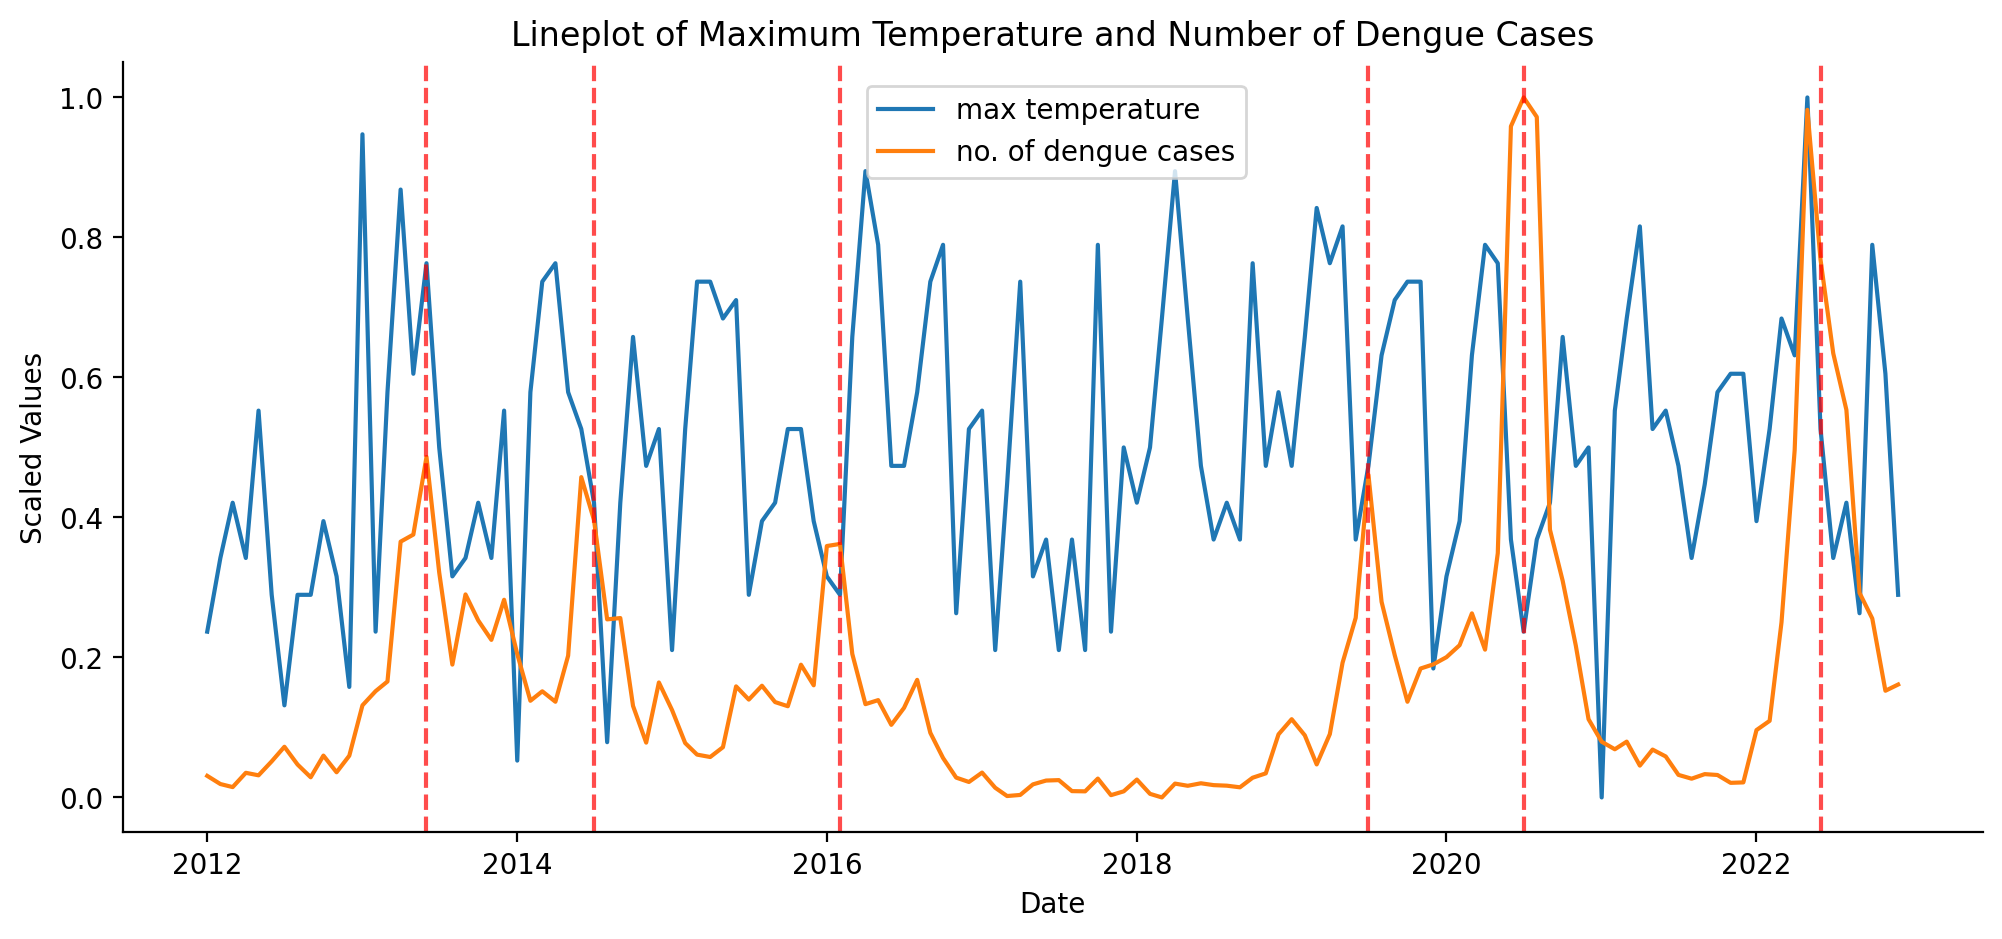

In [38]:
#creating the plot
plt.figure(figsize=(12,5),dpi = 200)
sns.lineplot(data=scaled_weather,x=scaled_weather.index,y=scaled_weather['Maximum Temperature (°C)'],label = 'max temperature')
sns.lineplot(data=scaled_weather,x=scaled_weather.index,y=scaled_weather['number_of_dengue_cases'], label = 'no. of dengue cases')

#setting title and labels
plt.ylabel('Scaled Values')
plt.title('Lineplot of Maximum Temperature and Number of Dengue Cases')

#show legend
plt.legend(loc=(0.4,0.85))

# Mark the spikes with red vertical lines
spike_dates = ['2013-06-01', '2014-07-01', '2016-02-01', '2019-07-01', '2020-07-01', '2022-06-01']
for date in spike_dates:
    plt.axvline(x=pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)
    
# remove the top and right spines of the plot
sns.despine();

As shown in the above lineplot, I have already used the weather feature which had the highest correlation value with number of dengue cases (0.28 from the lag period of -3 months), but the plots don't match at all.  This further suggests that weather data won't be useful in predicting dengue cases.

I will create an interactive plot to show that this is the same across the rest of the weather features.

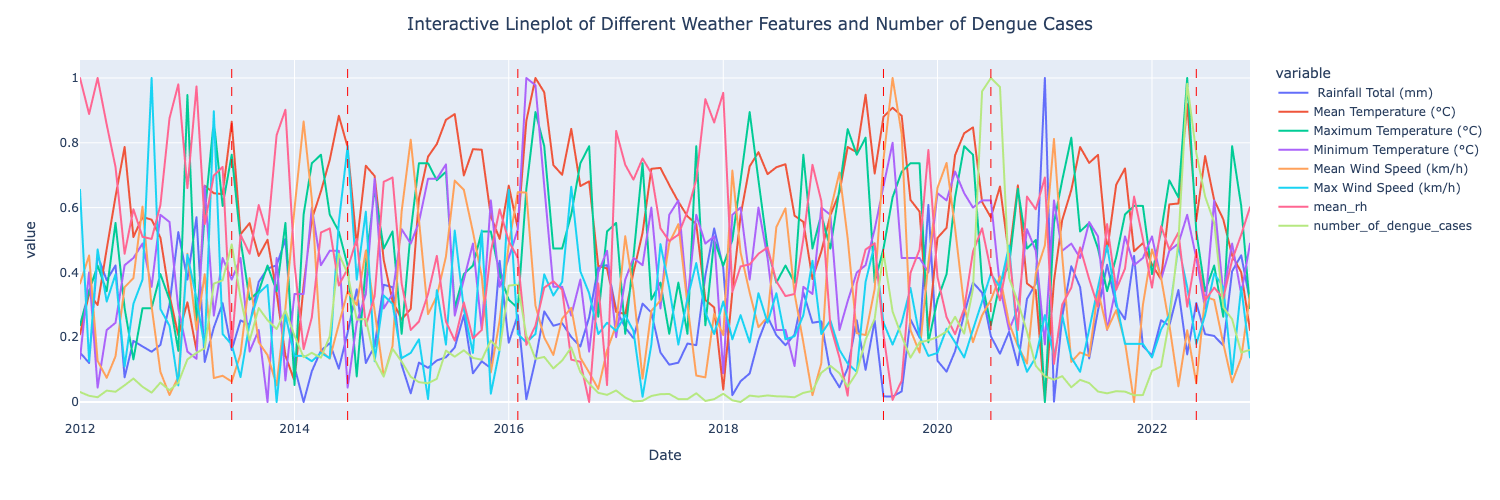

In [39]:
fig = px.line(scaled_weather)


# Add vertical red lines to the plot
for value in spike_dates:
    fig.add_shape(
        type="line",
        xref="x",
        yref="paper",
        x0=value,
        y0=0,
        x1=value,
        y1=1,
        line=dict(color="red", width=1, dash="dash"),
    )

# Update the layout to increase the size of the figure
fig.update_layout(
    width=1500,  # Specify the width of the figure
    height=500,  # Specify the height of the figure
    title='Interactive Lineplot of Different Weather Features and Number of Dengue Cases',
    title_x=0.5
)

fig.show()

Please select or deselect the variables you are interested in on the sidebar.

# Exploration of Reasons for the Spikes in Dengue Cases.

If weather data as we thought isn't the reason for the spikes in dengue cases. We need to find out what is actually causing the spikes so that we may try and include it into our features.

Based on my research, these are the following factors for the spikes found in the data.

1. [2013 Dengue Outbreak with the peak in June](https://en.wikipedia.org/wiki/2013_dengue_outbreak_in_Singapore#cite_note-10)
    1. [Outbreak was due to an increase in the DENV-1 serotype of the dengue virus. Because that strain was less common, the local community was more susceptible to it.](https://en.wikipedia.org/wiki/2013_dengue_outbreak_in_Singapore#cite_note-8_)
1. [2014 Dengue Outbreak](https://bmcinfectdis.biomedcentral.com/articles/10.1186/s12879-016-1606-z)
    1. [The same reason for the 2013 outbreak, the new strain caused an outbreak lasting two years from 2013 - 2014.](https://bmcinfectdis.biomedcentral.com/articles/10.1186/s12879-016-1606-z)
1. [2016 Dengue Outbreak](https://www.straitstimes.com/singapore/environment/dengue-cases-cross-11000-mark-in-first-8-months-of-2016)
    1. [This outbreak was due to a new strain called DENV-2.](https://www.straitstimes.com/singapore/health/singapore-faces-dengue-threat-from-emergence-of-little-seen-strain)
1. [2019 Dengue Outbreak](https://www.straitstimes.com/singapore/threefold-increase-in-dengue-cases-in-first-quarter-of-2019-compared-to-last-year)
    1. From my research, it is due to the [generally dengue peak season which occurs between June - July of each year](https://www.nea.gov.sg/media/news/news/index/number-of-weekly-dengue-cases-expected-to-exceed-the-historical-high-of-891-unless-urgent-collective-community-action-is-taken). This is also good to know as it would mean a model like ARIMA will be able to use this seasonality in its predictions compared to correlation heatmaps.

1. [2020 Dengue Outbreak](https://en.wikipedia.org/wiki/2020_dengue_outbreak_in_Singapore)
    1. Due to a new strain, DENV-3 and more importantly it waas also coupled during [Singapore's Circuit Breaker period to try and manage COVID](https://www.channelnewsasia.com/commentary/why-singapore-record-high-dengue-cases-covid-19-2020-coronavirus-687281)
    1. *With more people spending more daytime in naturally ventilated homes, the chance of mosquitoes acquiring the infection from dengue-infected individuals, and then passing it on when they bite healthy individuals, had risen. This is due to the biology of the Aedes aegypti mosquito, the main vector of dengue. The mosquito is known to bite during the day, peaking at dawn and dusk, rather than at night, and dwell among human habitats.*
1. [2022 Dengue Outbreak](https://www.straitstimes.com/singapore/health/singapore-records-19-dengue-deaths-in-2022-nearly-four-times-2021-s-toll)
    1. Due to the strain DENV-3 which was [not the prevalant serotype for over 30 years, which meant that herd immunity was still low.](https://www.dovepress.com/singapores-dengue-outbreak-amidst-the-covid-19-pandemic-challenges-res-peer-reviewed-fulltext-article-IDR)

# Summary of Analysis

**From the research I have done, we can see that the spikes in dengue cases in Singapore in the last decade have been mainly due to three things:**

1. There is a traditional dengue peak season which occurs between June - July of each year.
2. New strains of dengue appearing.
2. Because of social restrictions such as the circuit breaker period due to COVID.


The main takeaway from this knowledge is the following:
1. If the peak season happens generally between June - July of each year, which I further confirm below in the lineplot. **Please mouse over the line to see dates of each datapoint.** Notice that besides the spike in 2016, all other spikes occured between Jun - Jul. I should be able to create a model which is able to accurately predict the number of dengue cases solely based on the number of dengue cases in the preceding months excluding any external circumstances such as COVID / social restrictions or new strains emerging.


1. I am able to feature engineer a new featured called new strain for the years which had a new strain emerge. This may be able to help improve performance in predicting dengue cases.

1. I am able to feature engineer a new feature called social restrictions based on the periods in Singapore where social restrictions were placed by the government. I can check when these periods occurred and assign values accordingly. This may be able to help improve performance in predicting dengue cases.

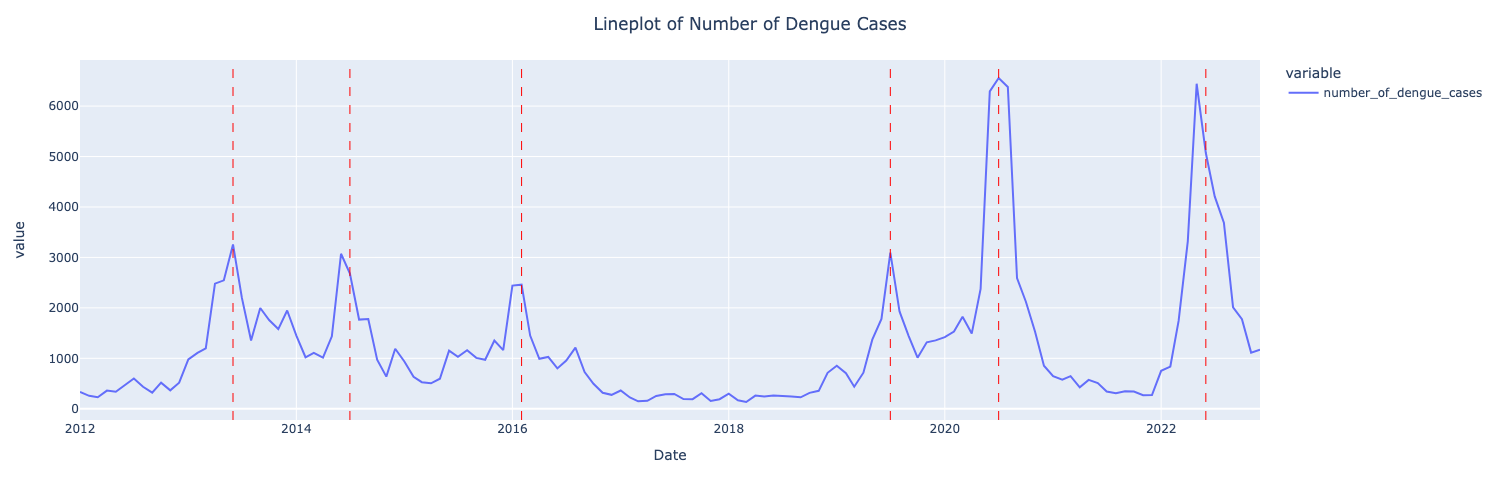

In [40]:
fig = px.line(monthly_weather['number_of_dengue_cases'])


# Add vertical red lines to the plot
for value in spike_dates:
    fig.add_shape(
        type="line",
        xref="x",
        yref="paper",
        x0=value,
        y0=0,
        x1=value,
        y1=1,
        line=dict(color="red", width=1, dash="dash"),
    )

# Update the layout to increase the size of the figure
fig.update_layout(
    width=1500,  # Specify the width of the figure
    height=500,  # Specify the height of the figure
    title='Lineplot of Number of Dengue Cases',
    title_x = 0.5
)

fig.show()

Onto the next notebook, where I will do the feature engineering and start fitting the data to my baseline model and try to improve it from there.